# Tutorial 2

In [1]:
import numpy as np
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

## Exercice 1 : A consine wave

### a) Let's consider the signal $x(t) = 5 cos(628 * t)$

Calculate the period in second [s]

In [2]:
period = (2 * np.pi) / np.abs(628)
print(f"period = {period} second")

period = 0.010005072145190424 second


Calculate the frequency in Hertz [Hz]

In [3]:
frequency = 1 / period
print(f"frequency = {frequency} Hertz")

frequency = 99.94930426171027 Hertz


Calculate the angular frequency in radian-per-second [rad/s]

In [4]:
angular_frequency = 2 * np.pi * frequency
print(f"angular frequency = {angular_frequency} rad/s")

angular frequency = 628.0 rad/s


What is the magnitude of this cosine?

In [5]:
x = np.linspace(0, 10, 10)
y = 5 * np.cos(628 * x)
magnitude = max(y)
print(f"magnitude = {magnitude}")

magnitude = 5.0


What is the phase of this cosine?

For this signal, we don't have phase.

Then $\phi = 0$

### b) Let's consider the above signal sampled with the sampling frequency $\mathit{F}_{s} = 1kHz$ over 10 seconds

What is the resulting length 𝑁 of this signal? (i.e. how many samples?)

In [6]:
samples = 1000 * 10
print(f"samples = {samples}")

samples = 10000


Construct the time axis t (from 0 to 10s)

In [7]:
x = np.linspace(0, 10, samples)

plot the signal in the time domain (i.e. x versus t)

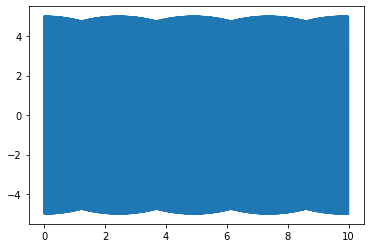

In [8]:
y = 5 * np.cos(628 * x)
plt.plot(x, y)
plt.show()

Inspect the time domain signal to measure the period of the signal (use close-ups to investigate closely the signal). Is it the same as the once calculated in a)?

![title]("TP2/img/plot_zoomed.png")

After graphic reading, we can get a period of 0.01 s

### c) Frequency domain analysis

What is the frequency resolution Δ𝑓 of the signal?

In [9]:
frequency_resolution = 1000 / samples
print(f"frequency resolution = {frequency_resolution} Hz")

frequency resolution = 0.1 Hz


Define a function “discrete_Fourrier_Transform()”, that takes as an input a signal and the sampling frequency, and returns as output its discrete Fourier transform 𝑋𝑘 and the frequency axis 𝑓.

In [42]:
def discrete_fourrier_transform(signal, fs):
    x = []
    for k in range(samples):
        xk = 0
        for i in range(samples):
            xk += signal[i]*np.exp(-2*np.pi*1j*i*k/samples)
        x.append(xk)
    return x



In [41]:
res, f = discrete_fourrier_transform(y, 1000)
print(len(res))
print(res)

KeyboardInterrupt: 

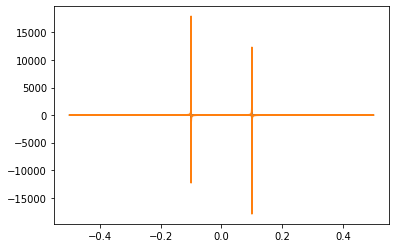

In [39]:
sp = np.fft.fft(y)
freq = np.fft.fftfreq(x.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()